# NAIVE BAYES CLASSIFIER CODE FOR SHOPPING DATASET.

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "D:\\NIT-J\\AI Lab\\Shopping 5th\\shopping.csv"

# CSV Reading
df = pd.read_csv(file_path)

# print(df.head())


In [2]:
# Convert categorical variables to numeric
df['Month'] = df['Month'].astype('category').cat.codes
df['VisitorType'] = df['VisitorType'].astype('category').cat.codes
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Define features (X) and target (y)
X = df.drop('Revenue', axis=1).values
y = df['Revenue'].values

# Train-test split function
def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split = int(X.shape[0] * (1 - test_size))
    return X[indices[:split]], X[indices[split:]], y[indices[:split]], y[indices[split:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Calculate prior probabilities
def calculate_prior(y):
    classes, counts = np.unique(y, return_counts=True)
    return dict(zip(classes, counts / len(y)))

# Calculate mean and variance for each feature in each class
def calculate_statistics(X, y):
    statistics = {}
    for class_label in np.unique(y):
        X_class = X[y == class_label]
        statistics[class_label] = [(np.mean(feature), np.var(feature)) for feature in X_class.T]
    return statistics

# Gaussian probability density function
def calculate_probability(x, mean, var):
    eps = 1e-4  # Small epsilon to avoid division by zero
    coefficient = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
    exponent = np.exp(-((x - mean) ** 2) / (2.0 * var + eps))
    return coefficient * exponent

# Calculate posterior probabilities
def calculate_posterior(X, statistics, prior):
    posteriors = []
    for class_label, class_stats in statistics.items():
        prior_prob = np.log(prior[class_label])  # Log of prior to avoid underflow
        conditional_prob = sum(np.log(calculate_probability(x, mean, var) + 1e-4) 
                               for x, (mean, var) in zip(X, class_stats))
        posteriors.append((prior_prob + conditional_prob, class_label))
    return max(posteriors)[1]  # Return class with highest posterior

# Train the model
prior = calculate_prior(y_train)
statistics = calculate_statistics(X_train, y_train)

# Make predictions
def predict(X, statistics, prior):
    return np.array([calculate_posterior(x, statistics, prior) for x in X])

# Evaluate accuracy
y_pred = predict(X_test, statistics, prior)
accuracy = np.mean(y_pred == y_test)

# Calculate precision and recall
TP = np.sum((y_test == 1) & (y_pred == 1))  # True Positives
FP = np.sum((y_test == 0) & (y_pred == 1))  # False Positives
TN = np.sum((y_test == 0) & (y_pred == 0))  # True Negatives
FN = np.sum((y_test == 1) & (y_pred == 0))  # False Negatives


precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

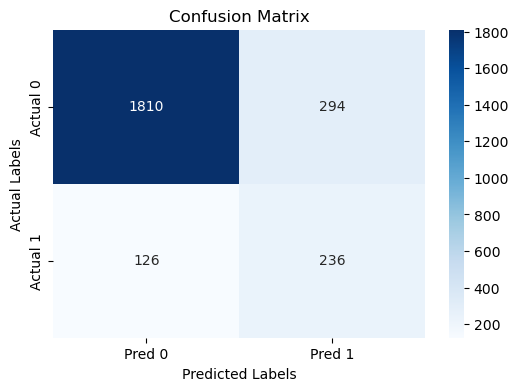


Accuracy: 0.829683698296837

Precision: 0.44528301886792454

Recall: 0.6519337016574586


In [3]:
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

print()
print("Accuracy:", accuracy)
print()
print("Precision:", precision)
print()
print("Recall:", recall)